In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
start = '2014-01-01'
end = '2024-09-10'
stock = 'TSLA'

data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,9.986667,10.165333,9.770000,10.006667,10.006667,92826000
2014-01-03,10.000000,10.146000,9.906667,9.970667,9.970667,70425000
2014-01-06,10.000000,10.026667,9.682667,9.800000,9.800000,80416500
2014-01-07,9.841333,10.026667,9.683333,9.957333,9.957333,75511500
2014-01-08,9.923333,10.246667,9.917333,10.085333,10.085333,92448000


In [ ]:
print("Total num of rows and columns :",data.shape)

Total num of rows and columns : (2689, 6)


In [ ]:
x = data.iloc[:,:3]
y = data['Close']

In [ ]:
2151/40

53.775

In [ ]:
print("Size of x :",x.shape)
print("Size of y :",y.shape)

Size of x : (2689, 3)
Size of y : (2689,)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2689 entries, 2014-01-02 to 2024-09-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2689 non-null   float64
 1   High       2689 non-null   float64
 2   Low        2689 non-null   float64
 3   Close      2689 non-null   float64
 4   Adj Close  2689 non-null   float64
 5   Volume     2689 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 147.1 KB


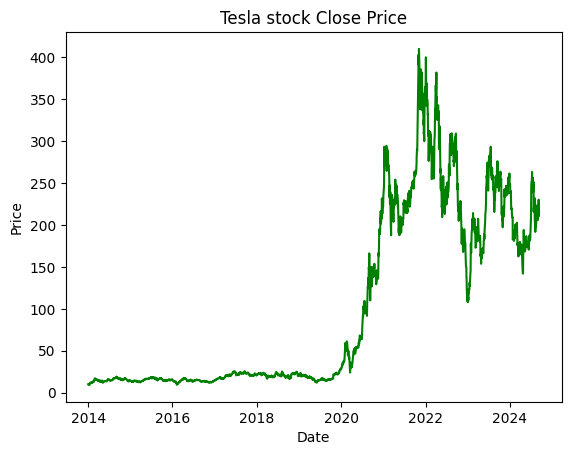

In [ ]:
sns.lineplot(data,x=data.index,y=data['Close'],c='g')
plt.title('Tesla stock Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

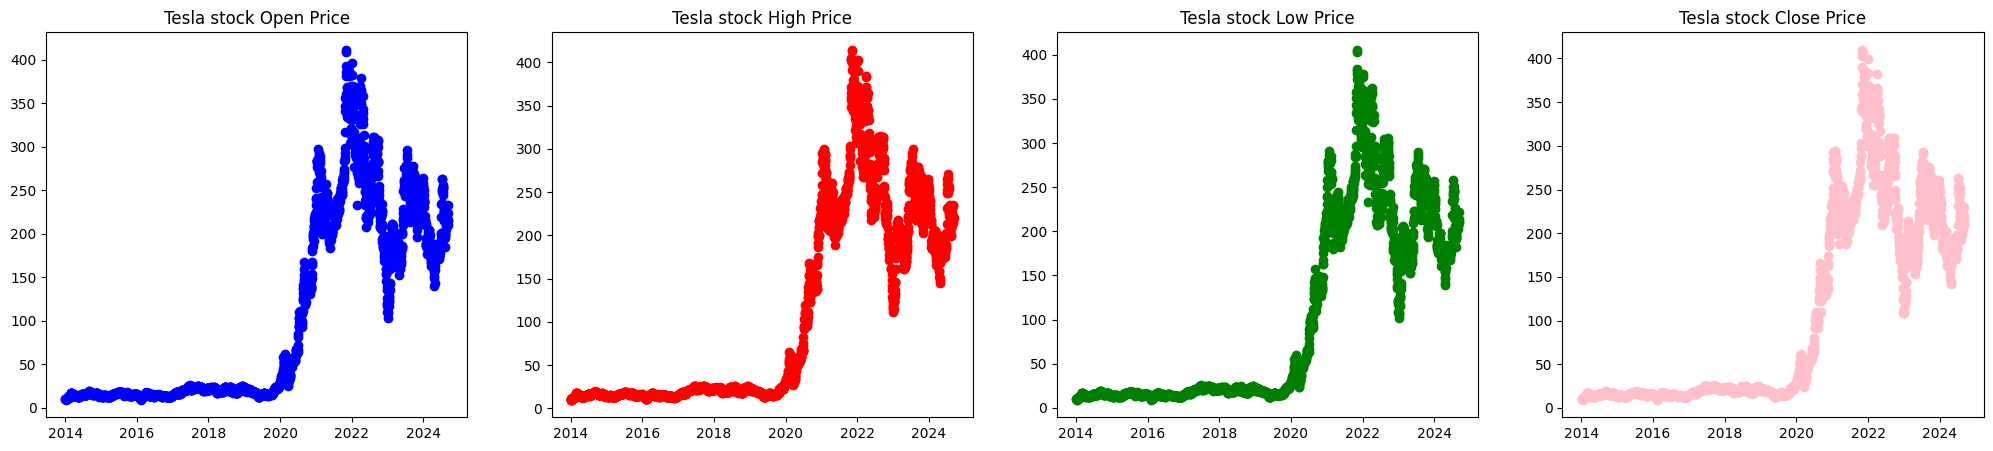

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 5))

ax1.scatter(x.index, x['Open'], color='blue')
ax1.set_title('Tesla stock Open Price')

ax2.scatter(x.index,x['High'],color='red')
ax2.set_title('Tesla stock High Price')

ax3.scatter(x.index,x['Low'],color='green')
ax3.set_title('Tesla stock Low Price')

ax4.scatter(y.index,y,color='pink')
ax4.set_title('Tesla stock Close Price')

plt.show()

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,9.986667,10.165333,9.770000,10.006667,10.006667,92826000
2014-01-03,10.000000,10.146000,9.906667,9.970667,9.970667,70425000
2014-01-06,10.000000,10.026667,9.682667,9.800000,9.800000,80416500
2014-01-07,9.841333,10.026667,9.683333,9.957333,9.957333,75511500
2014-01-08,9.923333,10.246667,9.917333,10.085333,10.085333,92448000
...,...,...,...,...,...,...
2024-09-03,215.259995,219.899994,209.639999,210.600006,210.600006,76714200
2024-09-04,210.589996,222.220001,210.570007,219.410004,219.410004,80651800
2024-09-05,223.490005,235.000000,222.250000,230.169998,230.169998,119355000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Machine Learning

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
models = [LinearRegression(),SVR(),DecisionTreeRegressor(random_state=12),RandomForestRegressor(random_state=12)]

In [ ]:
for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    res = r2_score(y_test,y_pred)
    print(model,"accuracy :",res)

LinearRegression() accuracy : 0.9997156376926414
SVR() accuracy : 0.977595445520882
DecisionTreeRegressor(random_state=12) accuracy : 0.9991032733057998
RandomForestRegressor(random_state=12) accuracy : 0.9994174839121025


In [ ]:
model1 = LinearRegression()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)

In [ ]:
print("Training Accuracy :",r2_score(y_train,model.predict(x_train)))
print("Test accuracy :",r2_score(y_test,y_pred))

Training Accuracy : 0.9999165710533235
Test accuracy : 0.9997156376926414


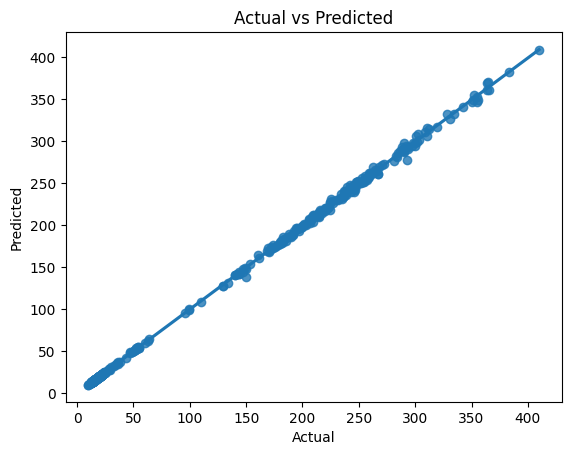

In [ ]:
sns.regplot(x= y_test, y=y_pred);
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
#Validate

In [ ]:
x.tail(1)

,Open,High,Low
Date,,,
2024-09-09,216.199997,219.869995,213.669998


In [ ]:
start = '2024-09-11'
end = '2024-09-18'
stock = 'TSLA'

test = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-11,224.550003,228.470001,216.800003,228.130005,228.130005,83548600
2024-09-12,224.660004,231.449997,223.830002,229.809998,229.809998,72020000
2024-09-13,228.000000,232.669998,226.320007,230.289993,230.289993,59515100
2024-09-16,229.300003,229.960007,223.529999,226.779999,226.779999,54323000
2024-09-17,229.500000,234.570007,226.553299,227.869995,227.869995,66620269


In [ ]:
x.columns

Index(['Open', 'High', 'Low'], dtype='object')

In [ ]:
new_x = test[['Open','High','Low']]
new_y = test['Close']

In [ ]:
new_pred = model1.predict(new_x)

test['Pred'] = new_pred
result = test[['Close','Pred']]
result

,Close,Pred
Date,,
2024-09-11,228.130005,221.457092
2024-09-12,229.809998,229.747612
2024-09-13,230.289993,230.629030
2024-09-16,226.779999,225.188790
2024-09-17,227.869995,231.395052


(array([19977., 19978., 19979., 19980., 19981., 19982., 19983.]),
 [Text(19977.0, 0, '2024-09-11'),
  Text(19978.0, 0, '2024-09-12'),
  Text(19979.0, 0, '2024-09-13'),
  Text(19980.0, 0, '2024-09-14'),
  Text(19981.0, 0, '2024-09-15'),
  Text(19982.0, 0, '2024-09-16'),
  Text(19983.0, 0, '2024-09-17')])

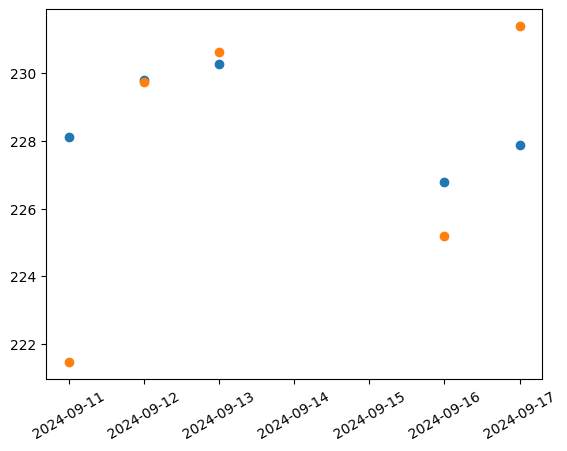

In [ ]:
plt.scatter(result.index,result['Close'])
plt.scatter(result.index,result['Pred'])
plt.xticks(rotation=30)

Deep Learning

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
x.shape

(2689, 3)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [ ]:
x_train

,Open,High,Low
Date,,,
2016-06-06,14.533333,14.726667,14.363333
2021-12-21,305.623322,313.166656,295.373322
2019-08-06,15.458667,15.500000,15.050000
2018-10-25,21.148001,21.400000,20.067333
2014-03-26,14.796667,14.840000,14.090000
...,...,...,...
2020-07-07,93.667336,95.300003,89.113998
2018-05-09,20.027332,20.467333,20.003332
2018-06-28,23.243999,23.801332,23.073999


In [ ]:
model = Sequential()
model.add(LSTM(256,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 346,497 (1.32 MB)

 Trainable params: 346,497 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['r2_score'])

In [ ]:
x_train

,Open,High,Low
Date,,,
2016-06-06,14.533333,14.726667,14.363333
2021-12-21,305.623322,313.166656,295.373322
2019-08-06,15.458667,15.500000,15.050000
2018-10-25,21.148001,21.400000,20.067333
2014-03-26,14.796667,14.840000,14.090000
...,...,...,...
2020-07-07,93.667336,95.300003,89.113998
2018-05-09,20.027332,20.467333,20.003332
2018-06-28,23.243999,23.801332,23.073999


In [ ]:
model.fit(x_train,y_train,epochs=100,batch_size=16)

Epoch 1/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 11386.0781 - r2_score: 0.0020 
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 395.1884 - r2_score: 0.9661
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 416.3567 - r2_score: 0.9630
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 339.0398 - r2_score: 0.9707
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 349.8669 - r2_score: 0.9697
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 299.9393 - r2_score: 0.9744
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 302.4868 - r2_score: 0.9732
Epoch 8/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 417.6434 - r2_score: 0.9636
Epoch 9/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 339.8607 - r2_score: 0.9699
Epoch 10/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 292.4778 - r2_score: 0.9744
Epoch 11/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 339.9450 - r2_score: 0.9710
Epoch

In [ ]:
y_pred= model.predict(x_test)
print(r2_score(y_test,y_pred))

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
0.9979588060080563


In [ ]:
y_test = y_test.ravel()
y_pred = y_pred.ravel()

In [ ]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
results_df.tail()

,Actual,Predicted
533,21.338667,20.398363
534,19.647333,18.654579
535,16.978666,15.976702
536,16.719999,15.780869
537,15.873333,14.985212


In [ ]:
test

,Open,High,Low,Close,Adj Close,Volume,Pred
Date,,,,,,,
2024-09-11,224.550003,228.470001,216.800003,228.130005,228.130005,83548600,221.457092
2024-09-12,224.660004,231.449997,223.830002,229.809998,229.809998,72020000,229.747612
2024-09-13,228.000000,232.669998,226.320007,230.289993,230.289993,59515100,230.629030
2024-09-16,229.300003,229.960007,223.529999,226.779999,226.779999,54323000,225.188790
2024-09-17,229.500000,234.570007,226.553299,227.869995,227.869995,66620269,231.395052


In [ ]:
x = test.iloc[:,:3]
y= test['Close']

In [ ]:
test['Pred1'] = model.predict(x)
res = test[['Close','Pred1']]
res

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


,Close,Pred1
Date,,
2024-09-11,228.130005,230.219131
2024-09-12,229.809998,236.800262
2024-09-13,230.289993,239.173126
2024-09-16,226.779999,236.394440
2024-09-17,227.869995,239.583130


In [ ]:
model.save('Stock_LSTM.h5')

In [ ]:
test

,Open,High,Low,Close,Adj Close,Volume,Pred,Pred1
Date,,,,,,,,
2024-09-11,224.550003,228.470001,216.800003,228.130005,228.130005,83548600,221.457092,230.219131
2024-09-12,224.660004,231.449997,223.830002,229.809998,229.809998,72020000,229.747612,236.800262
2024-09-13,228.000000,232.669998,226.320007,230.289993,230.289993,59515100,230.629030,239.173126
2024-09-16,229.300003,229.960007,223.529999,226.779999,226.779999,54323000,225.188790,236.394440
2024-09-17,229.500000,234.570007,226.553299,227.869995,227.869995,66620269,231.395052,239.583130


(array([19977., 19978., 19979., 19980., 19981., 19982., 19983.]),
 [Text(19977.0, 0, '2024-09-11'),
  Text(19978.0, 0, '2024-09-12'),
  Text(19979.0, 0, '2024-09-13'),
  Text(19980.0, 0, '2024-09-14'),
  Text(19981.0, 0, '2024-09-15'),
  Text(19982.0, 0, '2024-09-16'),
  Text(19983.0, 0, '2024-09-17')])

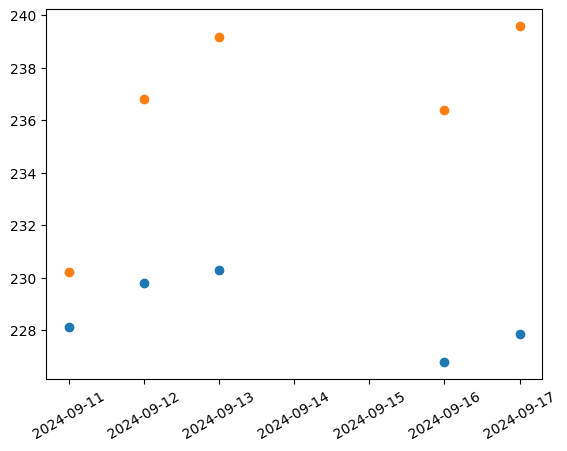

In [ ]:
plt.scatter(test.index,test['Close'])
plt.scatter(test.index,test['Pred1'])
plt.xticks(rotation=30)